In [28]:
%matplotlib inline
import matplotlib
if __name__=='__main__':
    matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.gridspec as gridspec
import glob
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times','Palatino']})
rc('text', usetex=True)
mpl.rcParams['xtick.major.size']=8
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['xtick.labelsize']=18
mpl.rcParams['ytick.labelsize']=18

import numpy as np




In [79]:
dp = np.loadtxt('PICO_forecast.dat')
dc = np.loadtxt('constraints_fisher_experiments.dat')

dd = np.loadtxt('dd.txt')

dxenon = np.loadtxt('xenon1t.txt')
dcresst = np.loadtxt('cresst-surface.txt')

dxenontop = np.loadtxt('xenon1t-top.txt')
dcressttop = np.loadtxt('cresst-surface-top.txt')

xpico = dp[:,0]
ypico = dp[:,1]

x = dc[:,0]
yplanck = dc[:,1]
ys3 = dc[:,2]
ys4 = dc[:,3]
ycv = dc[:,4]

xxenon = dxenon[:,0]
yxenon = dxenon[:,1]

xcresst = dcresst[:,0]
ycresst = dcresst[:,1]

xxenontop = dxenontop[:,0]
yxenontop = dxenontop[:,1]

xcressttop = dcressttop[:,0]
ycressttop = dcressttop[:,1]

xdd = dd[:,0]
ydd = dd[:,1]

from scipy.interpolate import interp1d
xenon_ceiling = interp1d(xxenontop,yxenontop,kind='cubic')
cresst_ceiling = interp1d(xcressttop,ycressttop,kind='cubic')



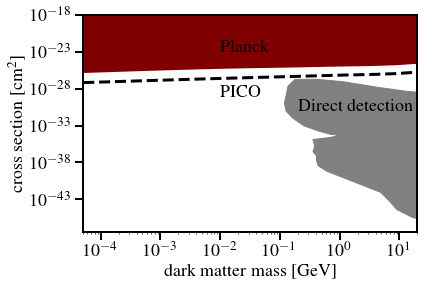

In [89]:
f,ax = plt.subplots()

ax.loglog(x, yplanck, lw=3, color='maroon')
#ax.loglog(x, ys3, '--', lw=3, color='maroon', label='S3')
#ax.loglog(x, ys4, '--', lw=3, color='maroon', label='CMB-S4')
ax.loglog(xpico, ypico, '--', lw=3, color='black')
ax.fill_between(x,yplanck,x/x*1e-18,color='maroon')
ax.fill(xdd,ydd,color='gray')

ax.set_xlim(xmax=20,xmin=5e-5)
ax.set_ylim(ymax=1e-18)

ax.set_xlabel(r'dark matter mass [GeV]', fontsize='18')
ax.set_ylabel(r'cross section [cm$^2$]', fontsize='18')

ax.annotate('Planck', xy=(1e-2, 1e-23), xycoords='data',fontsize=18)
ax.annotate('Direct detection', xy=(2e-1, 1e-31), xycoords='data',fontsize=18)
ax.annotate('PICO', xy=(1e-2, 1e-29), xycoords='data',fontsize=18)

f.savefig('pico_dd.pdf',bbox_inches='tight')


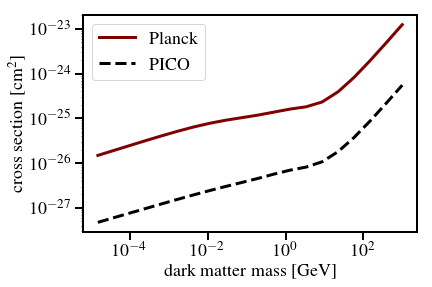

In [95]:
f,ax = plt.subplots()

ax.loglog(x, yplanck, lw=3, color='maroon',label='Planck')
ax.loglog(xpico, ypico, '--', lw=3, color='black',label='PICO')

ax.set_xlabel(r'dark matter mass [GeV]', fontsize='18')
ax.set_ylabel(r'cross section [cm$^2$]', fontsize='18')

ax.legend(loc='upper left',fontsize=18)
f.savefig('pico.pdf',bbox_inches='tight')

